<a href="https://colab.research.google.com/github/Jwangombe11/load-shortfall-regression-predict-api/blob/master/starter_Jackies_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# Libraries for data preparation and model building
#import *

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###
###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [23]:
df = pd.read_csv('df_train.csv')
#.iloc[:, 1:]# load the data
#df = pd.read_csv('df_test.csv')
#
df.head() # observe the first few rows

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  Seville_wind_speed  Barcelona_rain_1h Seville_pressure  Seville_rain_1h  Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  Madrid_temp  Madrid_temp_min  load_shortfall_3h
0           0  2015-01-01 03:00:00           0.666667           level_5             0.0             0.666667         74.333333        64.000000                0.0           1.000000                 0.0       223.333333              6.333333           42.666667                0.0            3.333333                0.0             sp25              0.0             0.0         1036.333333              0.0             0.0                0.0               0.0              800.0                 800.0      1035.000000               800.0        1002.666667        274.254667       971.333333         269.888000     269.888000              800.0    274.254667          75.666667         269.888000          281.013000       265.938000      281.013000       269.338615   269.338615          281.013000       269.338615        274.254667   265.938000       265.938000        6715.666667
1           1  2015-01-01 06:00:00           0.333333          level_10             0.0             1.666667         78.333333        64.666667                0.0           1.000000                 0.0       221.000000              4.000000          139.000000                0.0            3.333333                0.0             sp25              0.0             0.0         1037.333333              0.0             0.0                0.0               0.0              800.0                 800.0      1035.666667               800.0        1004.333333        274.945000       972.666667         271.728333     271.728333              800.0    274.945000          71.000000         271.728333          280.561667       266.386667      280.561667       270.376000   270.376000          280.561667       270.376000        274.945000   266.386667       266.386667        4171.666667
2           2  2015-01-01 09:00:00           1.000000           level_9             0.0             1.000000         71.333333        64.333333                0.0           1.000000                 0.0       214.333333              2.000000          326.000000                0.0            2.666667                0.0             sp25              0.0             0.0         1038.000000              0.0             0.0                0.0               0.0              800.0                 800.0      1036.000000               800.0        1005.333333        278.792000       974.000000         278.008667     278.008667              800.0    278.792000          65.666667         278.008667          281.583667       272.708667      281.583667       275.027229   275.027229          281.583667       275.027229        278.792000   272.708667       272.708667        4274.666667
3           3  2015-01-01 12:00:00           1.000000           level_8             0.0             1.000000         65.333333        56.333333                0.0           1.000000                 0.0       199.666667              2.333333          273.000000                0.0            4.000000                0.0             sp25              0.0             0.0         1037.000000              0.0             0.0                0.0               0.0             

The unnamed column is another indexing column.

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [24]:
# look at data statistics
df.shape # to check no. of rows and columns

(8763, 49)

The df_train_csv has a total of 8763 rows and 49 columns indicating 49 features.

In [25]:
# check which features are categorical and which ones are numericals
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

Time, Valencia_wind_deg, Seville_pressure have categorical data. While Valencia_wind_deg had categorical data the other wind_deg columns have numerical data. The same applies to Serville_pressure in comparison to the other pressure columns. Based on the output above there seems to be no null values.

In [26]:
# to confirm lack of null values
df.isnull().sum() # to check for null values in any of the column

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

Valencia_pressure column has 2068 null values

In [27]:
# to check the five value summary statistics
df.describe()

Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  Seville_wind_speed  Barcelona_rain_1h  Seville_rain_1h  Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  Madrid_temp  Madrid_temp_min  load_shortfall_3h
count  8763.000000        8763.000000     8763.000000          8763.000000       8763.000000      8763.000000        8763.000000        8763.000000         8763.000000      8763.000000           8763.000000         8763.000000        8763.000000         8763.000000        8763.000000      8763.000000     8763.000000        8.763000e+03      8763.000000     8763.000000        8763.000000       8763.000000        8763.000000           8763.000000      8763.000000         8763.000000        6695.000000       8763.000000      8763.000000        8763.000000    8763.000000        8763.000000   8763.000000        8763.000000        8763.000000         8763.000000      8763.000000     8763.000000      8763.000000  8763.000000         8763.000000      8763.000000       8763.000000  8763.000000      8763.000000        8763.000000
mean   4381.000000           2.425729        0.135753             2.586272         62.658793        57.414717          43.469132           1.850356           13.714748       158.957511              2.870497          190.544848          19.473392            2.425045           0.128906         0.039439        0.031912        1.377965e+03         0.000243        0.037818           0.000439          0.000205         773.527594            765.979687      1017.739549          774.658818        1012.051407        297.479527      1010.316920         291.337233     290.592152         724.722362    293.978903          65.247727         289.867648          291.157644       289.540309      289.855459       285.017973   286.422929          288.447422       287.966027        291.633356   288.419439       287.202203       10673.857612
std    2529.804538           1.850371        0.374901             2.411190         22.621226        24.335396          32.551044           1.695888           24.272482       102.056299              1.792197           89.077337          28.053660            1.672895           0.634730         0.175857        0.557264        1.407314e+04         0.003660        0.152639           0.003994          0.011866          77.313315             88.142235        10.046124           71.940009           9.506214          8.875812        22.198555           7.565692       7.162274         115.846537      7.920986          19.262322           6.907402            7.273538         9.752047        6.528111         6.705672     6.818682            6.102593         7.105590          8.178220     9.346796         9.206237        5218.046404
min       0.000000           0.000000        0.000000             0.000000          8.333333         6.333333           0.000000           0.000000            0.000000         0.000000              0.000000            0.000000           0.000000            0.000000           0.000000         0.000000        0.000000        6.706667e+02         0.000000        0.000000           0.000000          0.000000         211.000000            200.666667       971.333333          200.000000         972.666667        272.063000       927.666667         269.888000     269.888000         207.333333    272.063000          10.333333         269.888000          272.150000       264.98333

In [28]:
df.kurtosis()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

Barcelona_rain_1h, Seville_rain_1h, Bilbao_snow_3h, Barcelona_pressure,Seville_rain_3h, Madrid_rain_1h, Barcelona_rain_3h, Valencia_snow_3h, Madrid_weather_id, Barcelona_weather_id, Seville_weather_id, Bilbao_rain_1h, Valencia_wind_speed, Bilbao_wind_speed have a kurtosis of >3 indicating presences of outliers.


In [29]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

Madrid_clouds_all, Seville_wind_speed, Barcelona_rain_1h, Seville_rain_1h, 
Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, Madrid_rain_1h, Barcelona_rain_3h, Valencia_snow_3h, Madrid_wind_speed, Bilbao_rain_1h, Valencia_wind_speed, Bilbao_wind_speed, Seville_clouds_all,Barcelona_wind_speed have high positive skew.   
Madrid_weather_id, Barcelona_weather_id, Seville_weather_id, Valencia_pressure, Madrid_pressure, Bilbao_weather_id have a high negative skew.   







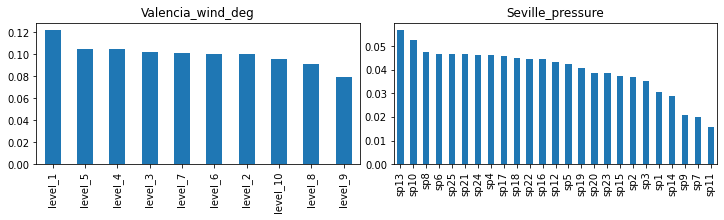

In [30]:
# plot relevant feature interactions
# Distribution of categorical features
plt.subplot(121)
df.Valencia_wind_deg.value_counts(normalize=True).plot(kind = 'bar', title = "Valencia_wind_deg",figsize=(10,3))
plt.tight_layout(pad=0.5)
plt.subplot(122)
df.Seville_pressure.value_counts(normalize=True).plot(kind = 'bar', title = "Seville_pressure")
plt.tight_layout(pad=0.5)


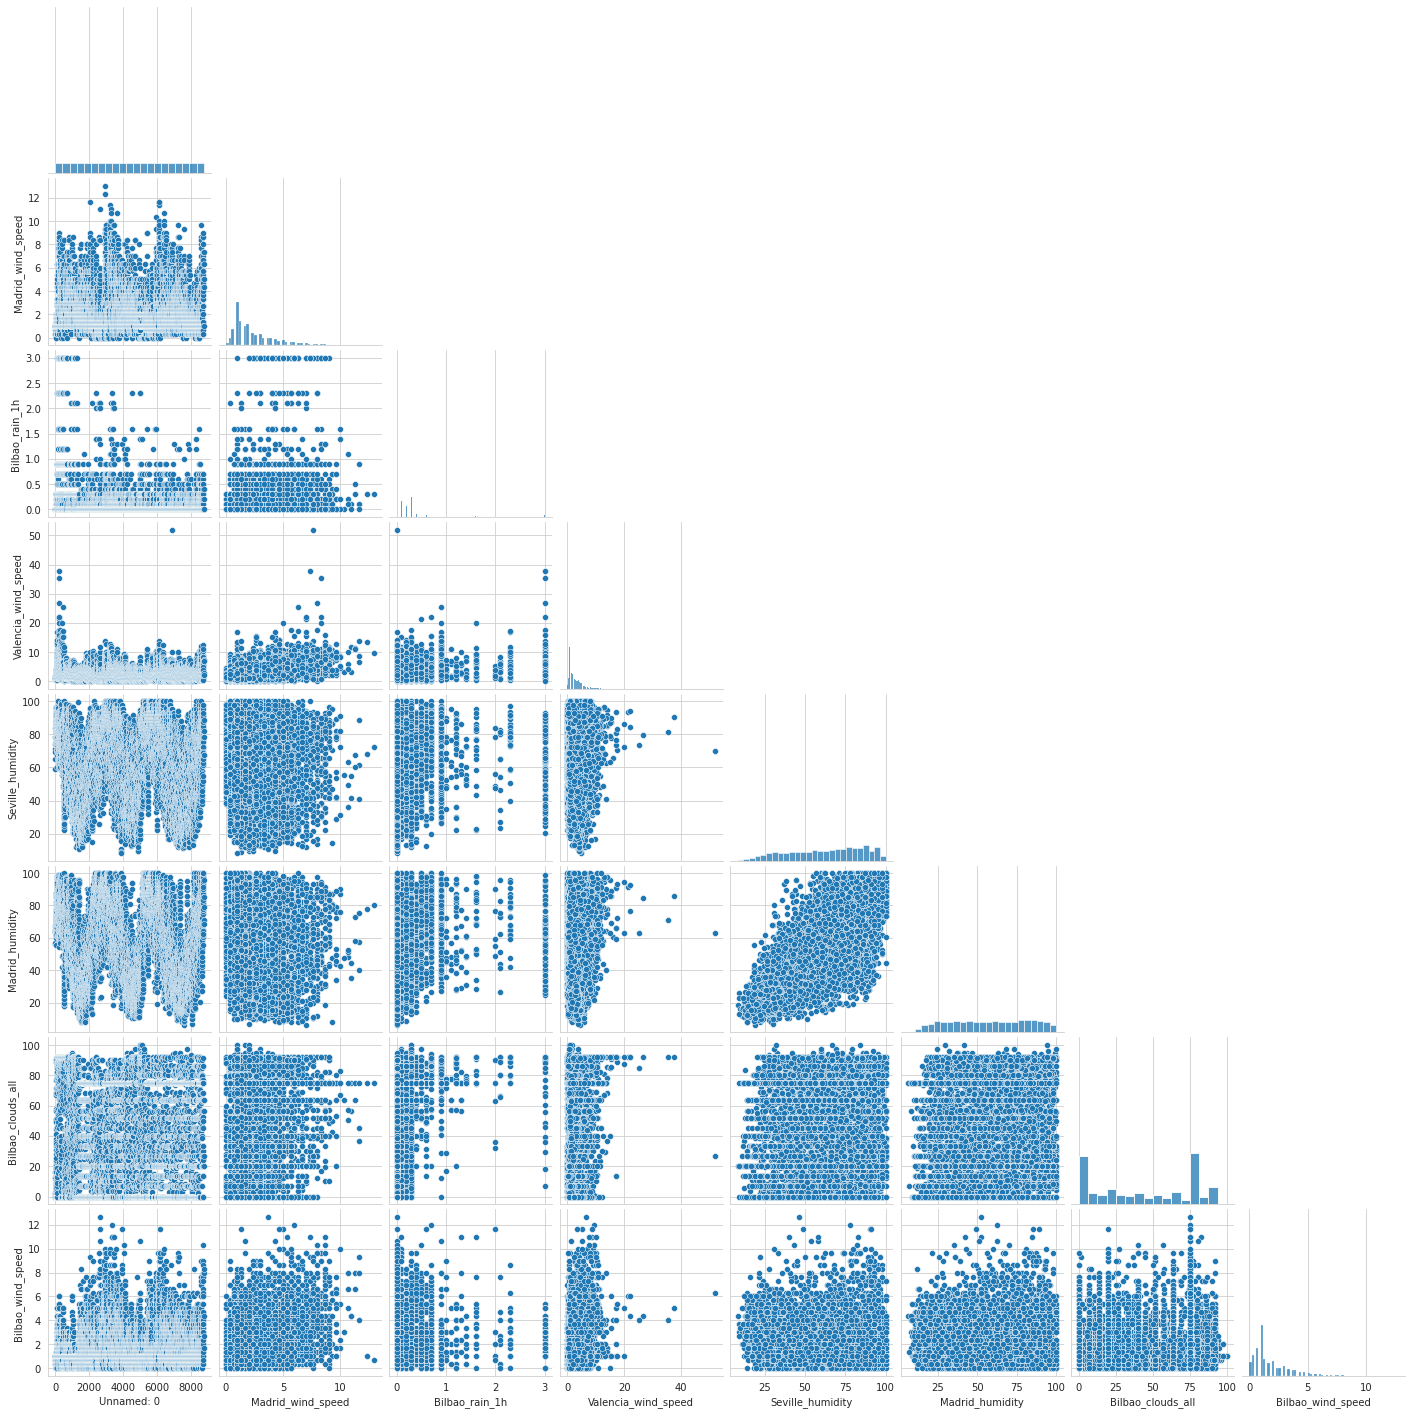

In [31]:
df_2 = df.iloc[:, 0:10]
sns.set_style("whitegrid");
sns.pairplot(df_2, corner=True);
plt.show();

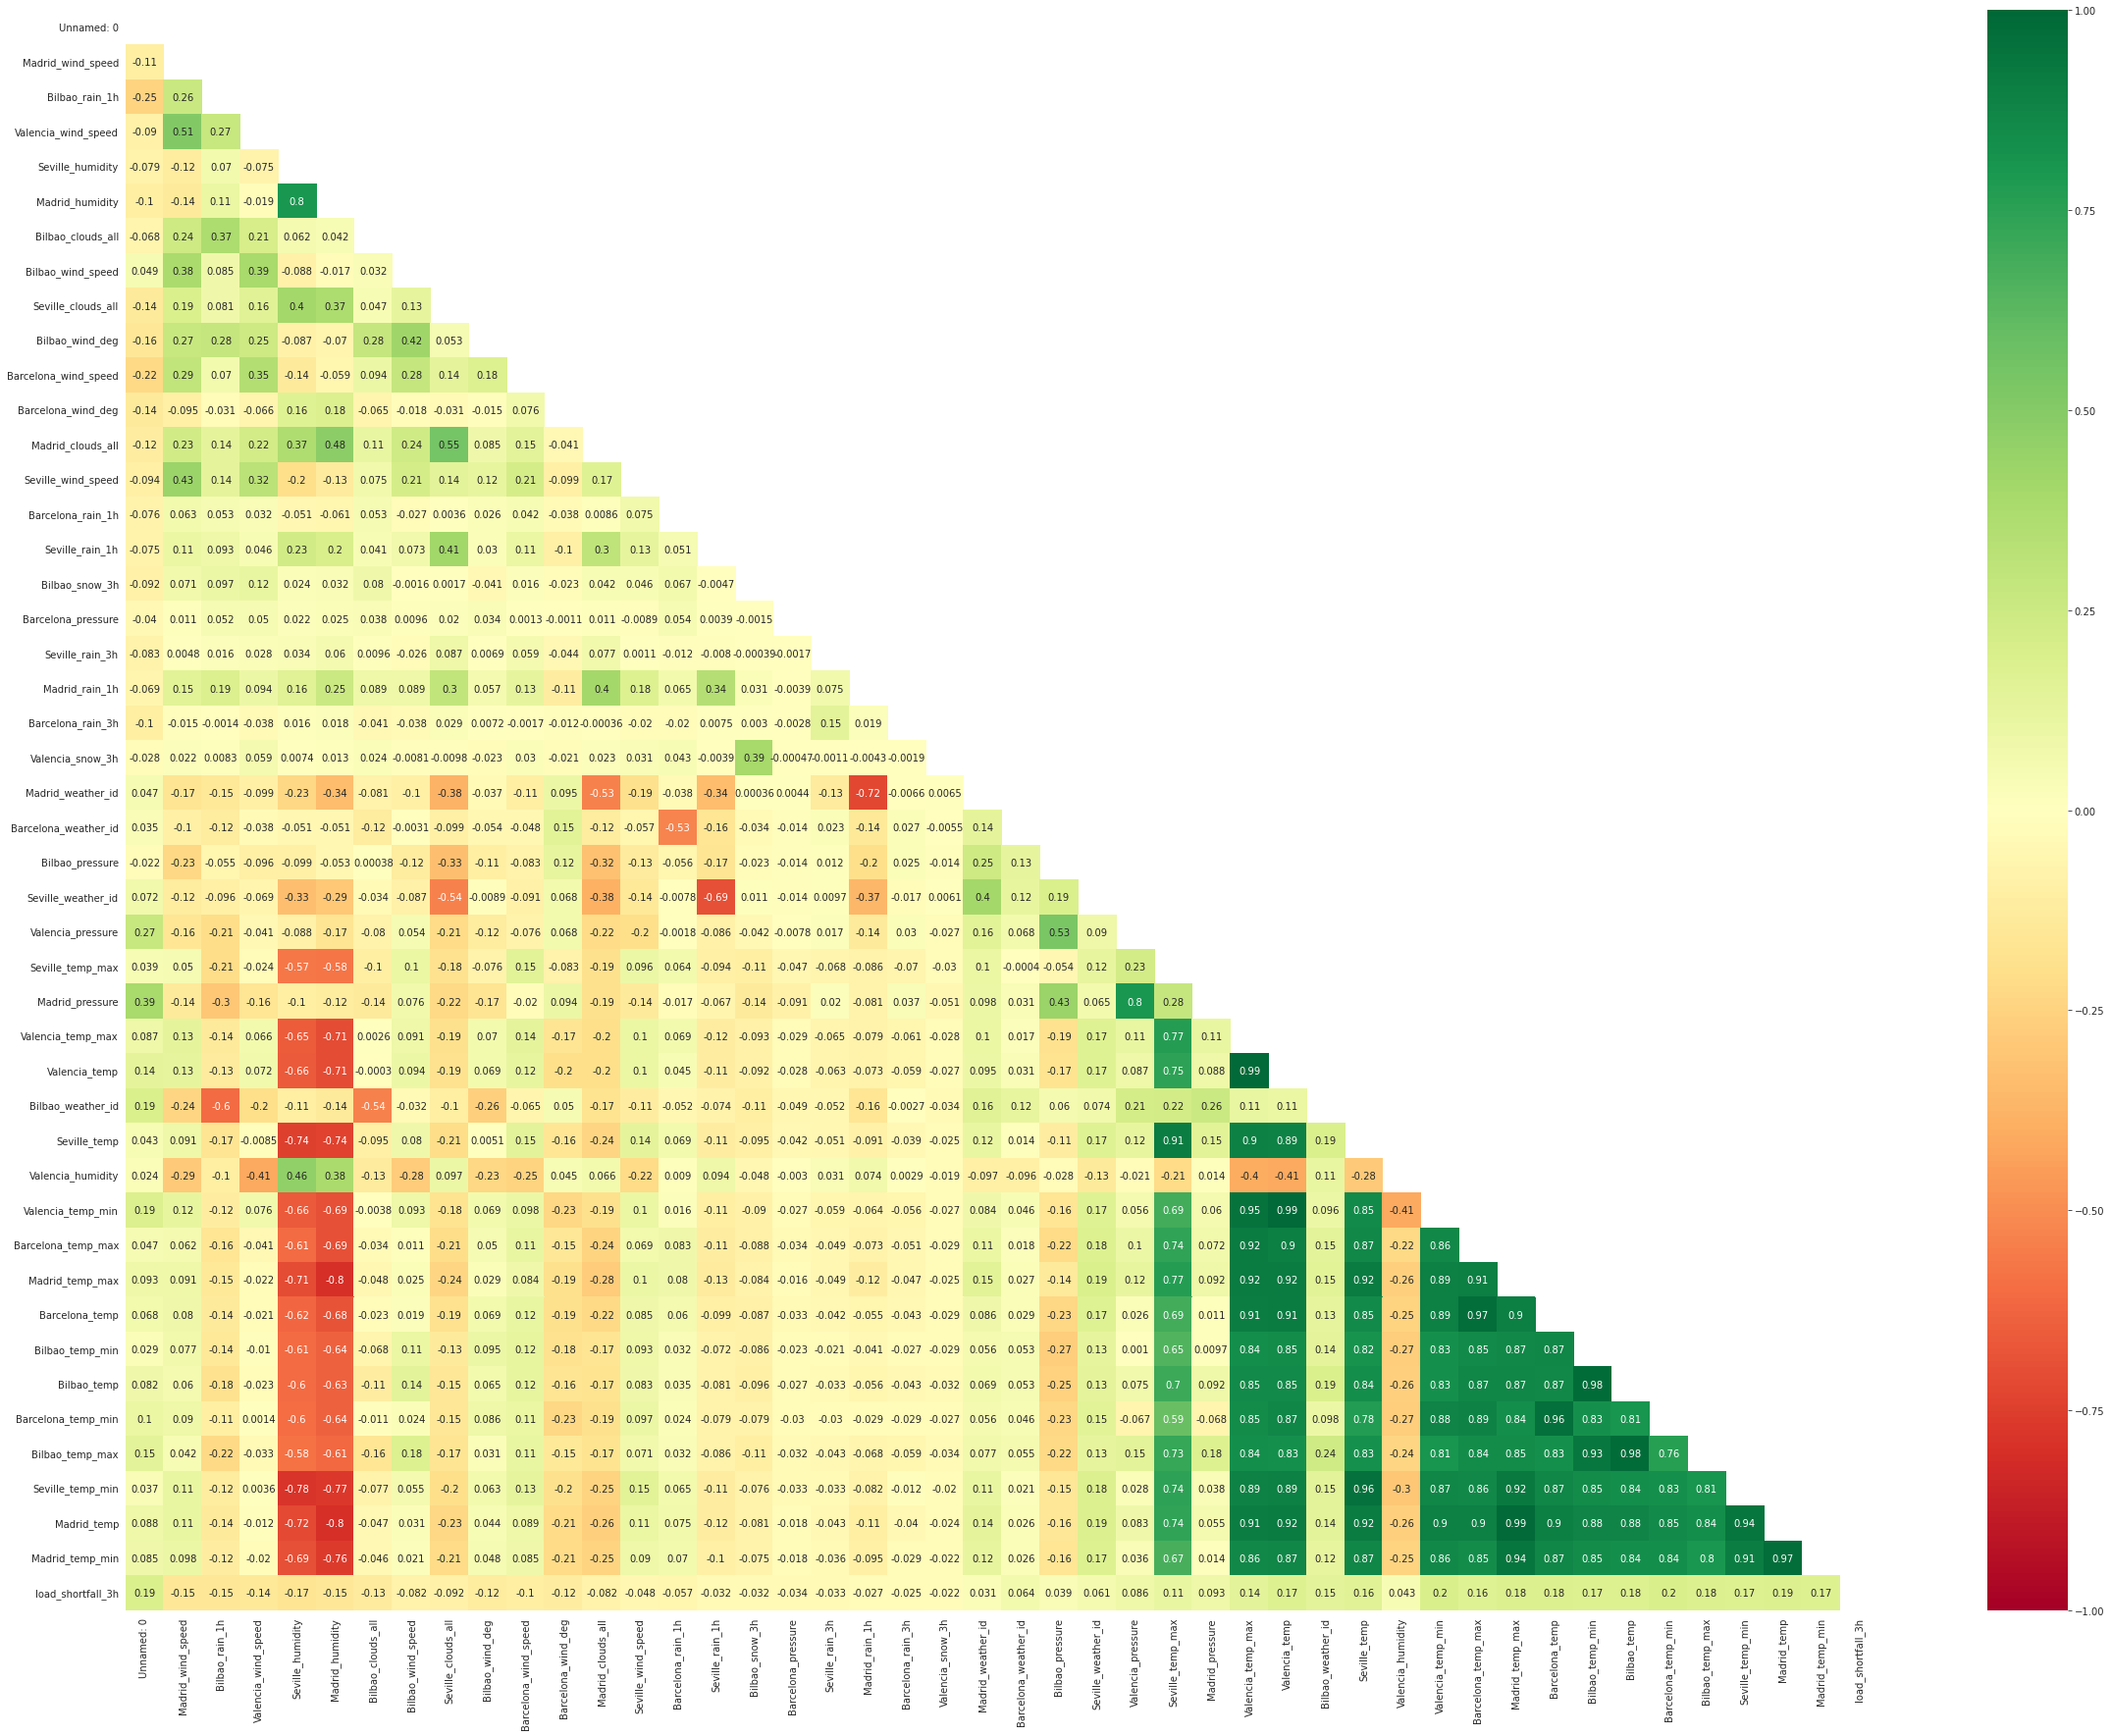

In [32]:
# evaluate correlation
corr_mat = df.corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(40,30))
    ax = sns.heatmap(corr_mat,vmin=-1,vmax=1,
mask=mask,annot=True,cmap="RdYlGn")

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [33]:
# remove missing values/ features
df = df.iloc[:, 1:]
df.head()

time  Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  Seville_wind_speed  Barcelona_rain_1h Seville_pressure  Seville_rain_1h  Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  Madrid_temp  Madrid_temp_min  load_shortfall_3h
0  2015-01-01 03:00:00           0.666667           level_5             0.0             0.666667         74.333333        64.000000                0.0           1.000000                 0.0       223.333333              6.333333           42.666667                0.0            3.333333                0.0             sp25              0.0             0.0         1036.333333              0.0             0.0                0.0               0.0              800.0                 800.0      1035.000000               800.0        1002.666667        274.254667       971.333333         269.888000     269.888000              800.0    274.254667          75.666667         269.888000          281.013000       265.938000      281.013000       269.338615   269.338615          281.013000       269.338615        274.254667   265.938000       265.938000        6715.666667
1  2015-01-01 06:00:00           0.333333          level_10             0.0             1.666667         78.333333        64.666667                0.0           1.000000                 0.0       221.000000              4.000000          139.000000                0.0            3.333333                0.0             sp25              0.0             0.0         1037.333333              0.0             0.0                0.0               0.0              800.0                 800.0      1035.666667               800.0        1004.333333        274.945000       972.666667         271.728333     271.728333              800.0    274.945000          71.000000         271.728333          280.561667       266.386667      280.561667       270.376000   270.376000          280.561667       270.376000        274.945000   266.386667       266.386667        4171.666667
2  2015-01-01 09:00:00           1.000000           level_9             0.0             1.000000         71.333333        64.333333                0.0           1.000000                 0.0       214.333333              2.000000          326.000000                0.0            2.666667                0.0             sp25              0.0             0.0         1038.000000              0.0             0.0                0.0               0.0              800.0                 800.0      1036.000000               800.0        1005.333333        278.792000       974.000000         278.008667     278.008667              800.0    278.792000          65.666667         278.008667          281.583667       272.708667      281.583667       275.027229   275.027229          281.583667       275.027229        278.792000   272.708667       272.708667        4274.666667
3  2015-01-01 12:00:00           1.000000           level_8             0.0             1.000000         65.333333        56.333333                0.0           1.000000                 0.0       199.666667              2.333333          273.000000                0.0            4.000000                0.0             sp25              0.0             0.0         1037.000000              0.0             0.0                0.0               0.0              800.0                 800.0      1036.000000               800.0        10

In [34]:
df.fillna(df['Valencia_pressure'].median(), inplace = True)
df.isnull().sum()

time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_

In [35]:
# create new features
df_2 = df.copy()

In [36]:
bins = [0, 36, 72, 108, 144, 180, 216, 252, 288, 324, 360]
labels = ["level_1","level_2","level_3","level_4", "level_5","level_6","level_7","level_8","level_9","level_10"]
df_2['Barcelona_wind_deg_cat'] = pd.cut(df_2['Barcelona_wind_deg'], bins=bins, labels=labels, include_lowest=True)
cols = ['Barcelona_wind_deg_cat', 'Barcelona_wind_deg']
df_2[cols]

Barcelona_wind_deg_cat  Barcelona_wind_deg
0                   level_2           42.666667
1                   level_4          139.000000
2                  level_10          326.000000
3                   level_8          273.000000
4                   level_8          260.000000
...                     ...                 ...
8758                level_3           83.666667
8759                level_6          213.333333
8760                level_8          256.666667
8761                level_7          250.000000
8762                level_8          253.333333

[8763 rows x 2 columns]

In [37]:
bins = [0, 36, 72, 108, 144, 180, 216, 252, 288, 324, 360]
labels = ["level_1","level_2","level_3","level_4", "level_5","level_6","level_7","level_8","level_9","level_10"]
df_2['Bilbao_wind_deg_cat'] = pd.cut(df_2['Bilbao_wind_deg'], bins=bins, labels=labels, include_lowest=True)
cols_2 = ['Bilbao_wind_deg_cat', 'Bilbao_wind_deg']
df_2[cols_2]

Bilbao_wind_deg_cat  Bilbao_wind_deg
0                level_7       223.333333
1                level_7       221.000000
2                level_6       214.333333
3                level_6       199.666667
4                level_6       185.000000
...                  ...              ...
8758             level_7       226.666667
8759             level_7       220.000000
8760             level_8       283.333333
8761             level_7       220.000000
8762             level_5       156.666667

[8763 rows x 2 columns]

In [38]:
#diff = 
df_2.Barcelona_pressure.max() 
interval = df_2.Barcelona_pressure.max()/25
interval

40056.44

In [39]:
bins = [0, 40057, 80114, 120171, 160228, 200285, 240342, 280399, 320456, 360513, 400570, 440627, 480684, 520741, 560798, 600855, 640912, 680969, 721026, 761083, 801140, 841197, 881254, 921311, 961368, 1001425]
labels = ["sp1","sp2","sp3","sp4", "sp5","sp6","sp7","sp8","sp9","sp10","sp11","sp12","sp13","sp14","sp15","sp16","sp17","sp18","sp19","sp20","sp21","sp22","sp23","sp24","sp25",]
df_2['Barcelona_pressure_cat'] = pd.cut(df_2['Barcelona_pressure'], bins=bins, labels=labels, include_lowest=True)
cols_3 = ['Barcelona_pressure_cat', 'Barcelona_pressure']
df_2[cols_3]

Barcelona_pressure_cat  Barcelona_pressure
0                       sp1         1036.333333
1                       sp1         1037.333333
2                       sp1         1038.000000
3                       sp1         1037.000000
4                       sp1         1035.000000
...                     ...                 ...
8758                    sp1         1021.000000
8759                    sp1         1019.000000
8760                    sp1         1015.666667
8761                    sp1         1015.000000
8762                    sp1         1016.000000

[8763 rows x 2 columns]

In [40]:
bins = [0, 40057, 80114, 120171, 160228, 200285, 240342, 280399, 320456, 360513, 400570, 440627, 480684, 520741, 560798, 600855, 640912, 680969, 721026, 761083, 801140, 841197, 881254, 921311, 961368, 1001425]
labels = ["sp1","sp2","sp3","sp4", "sp5","sp6","sp7","sp8","sp9","sp10","sp11","sp12","sp13","sp14","sp15","sp16","sp17","sp18","sp19","sp20","sp21","sp22","sp23","sp24","sp25",]
df_2['Barcelona_pressure_cat'] = pd.cut(df_2['Barcelona_pressure'], bins=bins, labels=labels, include_lowest=True)
cols_3 = ['Barcelona_pressure_cat', 'Barcelona_pressure']
df_2[cols_3]

Barcelona_pressure_cat  Barcelona_pressure
0                       sp1         1036.333333
1                       sp1         1037.333333
2                       sp1         1038.000000
3                       sp1         1037.000000
4                       sp1         1035.000000
...                     ...                 ...
8758                    sp1         1021.000000
8759                    sp1         1019.000000
8760                    sp1         1015.666667
8761                    sp1         1015.000000
8762                    sp1         1016.000000

[8763 rows x 2 columns]

In [41]:
 
bins = [0, 40057, 80114, 120171, 160228, 200285, 240342, 280399, 320456, 360513, 400570, 440627, 480684, 520741, 560798, 600855, 640912, 680969, 721026, 761083, 801140, 841197, 881254, 921311, 961368, 1001425]
labels = ["sp1","sp2","sp3","sp4", "sp5","sp6","sp7","sp8","sp9","sp10","sp11","sp12","sp13","sp14","sp15","sp16","sp17","sp18","sp19","sp20","sp21","sp22","sp23","sp24","sp25",]
df_2['Bilbao_pressure_cat'] = pd.cut(df_2['Bilbao_pressure'], bins=bins, labels=labels, include_lowest=True)
cols_4 = ['Bilbao_pressure_cat', 'Bilbao_pressure']
df_2[cols_4].head(1000)

Bilbao_pressure_cat  Bilbao_pressure
0                   sp1      1035.000000
1                   sp1      1035.666667
2                   sp1      1036.000000
3                   sp1      1036.000000
4                   sp1      1035.333333
..                  ...              ...
995                 sp1      1016.666667
996                 sp1      1017.333333
997                 sp1      1018.333333
998                 sp1      1019.666667
999                 sp1      1020.000000

[1000 rows x 2 columns]

In [42]:
bins = [0, 40057, 80114, 120171, 160228, 200285, 240342, 280399, 320456, 360513, 400570, 440627, 480684, 520741, 560798, 600855, 640912, 680969, 721026, 761083, 801140, 841197, 881254, 921311, 961368, 1001425]
labels = ["sp1","sp2","sp3","sp4", "sp5","sp6","sp7","sp8","sp9","sp10","sp11","sp12","sp13","sp14","sp15","sp16","sp17","sp18","sp19","sp20","sp21","sp22","sp23","sp24","sp25",]
df_2['Valencia_pressure_cat'] = pd.cut(df_2['Valencia_pressure'], bins=bins, labels=labels, include_lowest=True)
cols_5 = ['Valencia_pressure_cat', 'Valencia_pressure']
df_2[cols_5]

Valencia_pressure_cat  Valencia_pressure
0                      sp1        1002.666667
1                      sp1        1004.333333
2                      sp1        1005.333333
3                      sp1        1009.000000
4                      sp1        1015.000000
...                    ...                ...
8758                   sp1        1015.000000
8759                   sp1        1021.000000
8760                   sp1        1009.666667
8761                   sp1        1020.000000
8762                   sp1        1015.000000

[8763 rows x 2 columns]

In [43]:
bins = [0, 40057, 80114, 120171, 160228, 200285, 240342, 280399, 320456, 360513, 400570, 440627, 480684, 520741, 560798, 600855, 640912, 680969, 721026, 761083, 801140, 841197, 881254, 921311, 961368, 1001425]
labels = ["sp1","sp2","sp3","sp4", "sp5","sp6","sp7","sp8","sp9","sp10","sp11","sp12","sp13","sp14","sp15","sp16","sp17","sp18","sp19","sp20","sp21","sp22","sp23","sp24","sp25",]
df_2['Madrid_pressure_cat'] = pd.cut(df_2['Madrid_pressure'], bins=bins, labels=labels, include_lowest=True)
cols_6 = ['Madrid_pressure_cat', 'Madrid_pressure']
df_2[cols_6]

Madrid_pressure_cat  Madrid_pressure
0                    sp1       971.333333
1                    sp1       972.666667
2                    sp1       974.000000
3                    sp1       994.666667
4                    sp1      1035.333333
...                  ...              ...
8758                 sp1      1024.000000
8759                 sp1      1023.666667
8760                 sp1      1021.666667
8761                 sp1      1023.000000
8762                 sp1      1027.333333

[8763 rows x 2 columns]

In [44]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   time                    8763 non-null   object  
 1   Madrid_wind_speed       8763 non-null   float64 
 2   Valencia_wind_deg       8763 non-null   object  
 3   Bilbao_rain_1h          8763 non-null   float64 
 4   Valencia_wind_speed     8763 non-null   float64 
 5   Seville_humidity        8763 non-null   float64 
 6   Madrid_humidity         8763 non-null   float64 
 7   Bilbao_clouds_all       8763 non-null   float64 
 8   Bilbao_wind_speed       8763 non-null   float64 
 9   Seville_clouds_all      8763 non-null   float64 
 10  Bilbao_wind_deg         8763 non-null   float64 
 11  Barcelona_wind_speed    8763 non-null   float64 
 12  Barcelona_wind_deg      8763 non-null   float64 
 13  Madrid_clouds_all       8763 non-null   float64 
 14  Seville_wind_speed      

In [45]:
df_4 = df_2.drop(['Barcelona_wind_deg','Bilbao_wind_deg','Barcelona_pressure','Bilbao_pressure','Valencia_pressure','Madrid_pressure'], axis = 1)
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   time                    8763 non-null   object  
 1   Madrid_wind_speed       8763 non-null   float64 
 2   Valencia_wind_deg       8763 non-null   object  
 3   Bilbao_rain_1h          8763 non-null   float64 
 4   Valencia_wind_speed     8763 non-null   float64 
 5   Seville_humidity        8763 non-null   float64 
 6   Madrid_humidity         8763 non-null   float64 
 7   Bilbao_clouds_all       8763 non-null   float64 
 8   Bilbao_wind_speed       8763 non-null   float64 
 9   Seville_clouds_all      8763 non-null   float64 
 10  Barcelona_wind_speed    8763 non-null   float64 
 11  Madrid_clouds_all       8763 non-null   float64 
 12  Seville_wind_speed      8763 non-null   float64 
 13  Barcelona_rain_1h       8763 non-null   float64 
 14  Seville_pressure        

In [47]:
# engineer existing features
for x in ['Barcelona_rain_1h']:
    q75,q25 = np.percentile(df_4.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_4.loc[df_4[x] < min,x] = np.nan
    df_4.loc[df_4[x] > max,x] = np.nan

for x in ['Seville_rain_1h']:
    q75,q25 = np.percentile(df_4.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_4.loc[df_4[x] < min,x] = np.nan
    df_4.loc[df_4[x] > max,x] = np.nan


for x in ['Bilbao_snow_3h']:
    q75,q25 = np.percentile(df_4.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_4.loc[df_4[x] < min,x] = np.nan
    df_4.loc[df_4[x] > max,x] = np.nan


for x in ['Seville_rain_3h']:
    q75,q25 = np.percentile(df_4.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_4.loc[df_4[x] < min,x] = np.nan
    df_4.loc[df_4[x] > max,x] = np.nan


for x in ['Madrid_rain_1h']:
    q75,q25 = np.percentile(df_4.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_4.loc[df_4[x] < min,x] = np.nan
    df_4.loc[df_4[x] > max,x] = np.nan


for x in ['Barcelona_rain_3h']:
    q75,q25 = np.percentile(df_4.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_4.loc[df_4[x] < min,x] = np.nan
    df_4.loc[df_4[x] > max,x] = np.nan


for x in ['Valencia_snow_3h']:
    q75,q25 = np.percentile(df_4.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_4.loc[df_4[x] < min,x] = np.nan
    df_4.loc[df_4[x] > max,x] = np.nan

for x in ['Bilbao_rain_1h']:
    q75,q25 = np.percentile(df_4.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_4.loc[df_4[x] < min,x] = np.nan
    df_4.loc[df_4[x] > max,x] = np.nan

for x in ['Valencia_wind_speed']:
    q75,q25 = np.percentile(df_4.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_4.loc[df_4[x] < min,x] = np.nan
    df_4.loc[df_4[x] > max,x] = np.nan

for x in ['Bilbao_wind_speed']:
    q75,q25 = np.percentile(df_4.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_4.loc[df_4[x] < min,x] = np.nan
    df_4.loc[df_4[x] > max,x] = np.nan



df_4.isnull().sum()

time                         0
Madrid_wind_speed            0
Valencia_wind_deg            0
Bilbao_rain_1h            1576
Valencia_wind_speed        327
Seville_humidity             0
Madrid_humidity              0
Bilbao_clouds_all            0
Bilbao_wind_speed          380
Seville_clouds_all           0
Barcelona_wind_speed         0
Madrid_clouds_all            0
Seville_wind_speed           0
Barcelona_rain_1h         1297
Seville_pressure             0
Seville_rain_1h            854
Bilbao_snow_3h              97
Seville_rain_3h             90
Madrid_rain_1h             928
Barcelona_rain_3h          223
Valencia_snow_3h             5
Madrid_weather_id            0
Barcelona_weather_id         0
Seville_weather_id           0
Seville_temp_max             0
Valencia_temp_max            0
Valencia_temp                0
Bilbao_weather_id            0
Seville_temp                 0
Valencia_humidity            0
Valencia_temp_min            0
Barcelona_temp_max           0
Madrid_t

In [48]:
df_4['Bilbao_rain_1h'].fillna(df_4['Bilbao_rain_1h'].median(), inplace=True)
df_4['Valencia_wind_speed'].fillna(df_4['Valencia_wind_speed'].median(), inplace=True)
df_4['Bilbao_wind_speed'].fillna(df_4['Bilbao_wind_speed'].median(), inplace=True)
df_4['Barcelona_rain_1h'].fillna(df_4['Barcelona_rain_1h'].median(), inplace=True)
df_4['Seville_rain_1h'].fillna(df_4['Seville_rain_1h'].median(), inplace=True)
df_4['Bilbao_snow_3h'].fillna(df_4['Bilbao_snow_3h'].median(), inplace=True)
df_4['Seville_rain_3h'].fillna(df_4['Seville_rain_3h'].median(), inplace=True)
df_4['Madrid_rain_1h'].fillna(df_4['Madrid_rain_1h'].median(), inplace=True)
df_4['Barcelona_rain_3h'].fillna(df_4['Barcelona_rain_3h'].median(), inplace=True)
df_4['Valencia_snow_3h'].fillna(df_4['Valencia_snow_3h'].median(), inplace=True)


In [49]:
df_4['time'] = pd.to_datetime(df_4['time'])
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   time                    8763 non-null   datetime64[ns]
 1   Madrid_wind_speed       8763 non-null   float64       
 2   Valencia_wind_deg       8763 non-null   object        
 3   Bilbao_rain_1h          8763 non-null   float64       
 4   Valencia_wind_speed     8763 non-null   float64       
 5   Seville_humidity        8763 non-null   float64       
 6   Madrid_humidity         8763 non-null   float64       
 7   Bilbao_clouds_all       8763 non-null   float64       
 8   Bilbao_wind_speed       8763 non-null   float64       
 9   Seville_clouds_all      8763 non-null   float64       
 10  Barcelona_wind_speed    8763 non-null   float64       
 11  Madrid_clouds_all       8763 non-null   float64       
 12  Seville_wind_speed      8763 non-null   float64 

In [50]:
df_dummies = pd.get_dummies(df_4)

In [51]:
df_dummies.shape

(8763, 195)

# Test data


In [5]:
df2 = pd.read_csv('df_test.csv').iloc[:, 1:]
df2.head()

time  Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  Seville_wind_speed  Barcelona_rain_1h Seville_pressure  Seville_rain_1h  Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  Madrid_temp  Madrid_temp_min
0  2018-01-01 00:00:00           5.000000           level_8             0.0             5.000000         87.000000        71.333333          20.000000           3.000000            0.000000       193.333333              4.000000          176.666667                0.0            1.000000                0.0             sp25              0.0               0         1017.333333              0.0             0.0                0.0                 0              800.0            800.000000      1025.666667          800.000000                NaN        284.483333      1030.000000         287.483333     287.483333         801.000000    283.673333          46.333333         287.483333          287.816667       280.816667      287.356667       276.150000   280.380000          286.816667       285.150000        283.150000   279.866667       279.150000
1  2018-01-01 03:00:00           4.666667           level_8             0.0             5.333333         89.000000        78.000000           0.000000           3.666667            0.000000       143.333333              4.666667          266.666667                0.0            0.666667                0.0             sp25              0.0               0         1020.333333              0.0             0.0                0.0                 0              800.0            800.333333      1026.666667          800.000000                NaN        282.483333      1030.333333         284.150000     284.150000         721.000000    281.673333          53.666667         284.150000          284.816667       280.483333      284.190000       277.816667   281.010000          283.483333       284.150000        281.150000   279.193333       278.150000
2  2018-01-01 06:00:00           2.333333           level_7             0.0             5.000000         89.000000        89.666667           0.000000           2.333333            6.666667       130.000000              4.000000          263.333333                0.0            0.666667                0.0             sp25              0.0               0         1023.000000              0.0             0.0                0.0                 0              800.0            800.000000      1025.333333          800.333333                NaN        280.816667      1030.666667         282.816667     282.816667         800.000000    280.613333          42.000000         282.816667          284.483333       276.483333      283.150000       276.816667   279.196667          281.816667       282.150000        280.483333   276.340000       276.150000
3  2018-01-01 09:00:00           2.666667           level_7             0.0             5.333333         93.333333        82.666667          26.666667           5.666667            6.666667       196.666667              2.333333           86.666667                0.0            1.333333                0.0             sp25              0.0               0         1025.666667              0.0             0.0                0.0                 0              800.0            800.000000      1025.000000          800.333333                NaN        281.150000      1032.333333         283.483333     283.4833

In [8]:
df2.fillna(df2['Valencia_pressure'].median(), inplace = True)
df2.isnull().sum()

time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_

In [9]:
# create new features
df3 = df2.copy()

In [10]:
bins = [0, 36, 72, 108, 144, 180, 216, 252, 288, 324, 360]
labels = ["level_1","level_2","level_3","level_4", "level_5","level_6","level_7","level_8","level_9","level_10"]
df3['Barcelona_wind_deg_cat'] = pd.cut(df3['Barcelona_wind_deg'], bins=bins, labels=labels, include_lowest=True)
cols = ['Barcelona_wind_deg_cat', 'Barcelona_wind_deg']
df3[cols]

Barcelona_wind_deg_cat  Barcelona_wind_deg
0                   level_5          176.666667
1                   level_8          266.666667
2                   level_8          263.333333
3                   level_3           86.666667
4                   level_8          283.333333
...                     ...                 ...
2915                level_9          320.000000
2916                level_9          293.333333
2917                level_7          233.333333
2918                level_8          253.333333
2919                level_9          310.000000

[2920 rows x 2 columns]

In [11]:
bins = [0, 36, 72, 108, 144, 180, 216, 252, 288, 324, 360]
labels = ["level_1","level_2","level_3","level_4", "level_5","level_6","level_7","level_8","level_9","level_10"]
df3['Bilbao_wind_deg_cat'] = pd.cut(df3['Bilbao_wind_deg'], bins=bins, labels=labels, include_lowest=True)
cols_2 = ['Bilbao_wind_deg_cat', 'Bilbao_wind_deg']
df3[cols_2]

Bilbao_wind_deg_cat  Bilbao_wind_deg
0                level_6       193.333333
1                level_4       143.333333
2                level_4       130.000000
3                level_6       196.666667
4                level_7       233.333333
...                  ...              ...
2915             level_2        70.000000
2916             level_2        36.666667
2917             level_1        14.666667
2918             level_1        19.000000
2919             level_4       120.000000

[2920 rows x 2 columns]

In [14]:
bins = [0, 40057, 80114, 120171, 160228, 200285, 240342, 280399, 320456, 360513, 400570, 440627, 480684, 520741, 560798, 600855, 640912, 680969, 721026, 761083, 801140, 841197, 881254, 921311, 961368, 1001425]
labels = ["sp1","sp2","sp3","sp4", "sp5","sp6","sp7","sp8","sp9","sp10","sp11","sp12","sp13","sp14","sp15","sp16","sp17","sp18","sp19","sp20","sp21","sp22","sp23","sp24","sp25",]
df3['Barcelona_pressure_cat'] = pd.cut(df3['Barcelona_pressure'], bins=bins, labels=labels, include_lowest=True)
cols_3 = ['Barcelona_pressure_cat', 'Barcelona_pressure']
df3[cols_3]

Barcelona_pressure_cat  Barcelona_pressure
0                       sp1         1017.333333
1                       sp1         1020.333333
2                       sp1         1023.000000
3                       sp1         1025.666667
4                       sp1         1026.000000
...                     ...                 ...
2915                    sp1         1029.666667
2916                    sp1         1028.666667
2917                    sp1         1027.000000
2918                    sp1         1027.000000
2919                    sp1         1028.000000

[2920 rows x 2 columns]

In [15]:
bins = [0, 40057, 80114, 120171, 160228, 200285, 240342, 280399, 320456, 360513, 400570, 440627, 480684, 520741, 560798, 600855, 640912, 680969, 721026, 761083, 801140, 841197, 881254, 921311, 961368, 1001425]
labels = ["sp1","sp2","sp3","sp4", "sp5","sp6","sp7","sp8","sp9","sp10","sp11","sp12","sp13","sp14","sp15","sp16","sp17","sp18","sp19","sp20","sp21","sp22","sp23","sp24","sp25",]
df3['Bilbao_pressure_cat'] = pd.cut(df3['Bilbao_pressure'], bins=bins, labels=labels, include_lowest=True)
cols_4 = ['Bilbao_pressure_cat', 'Bilbao_pressure']
df3[cols_4].head()

Bilbao_pressure_cat  Bilbao_pressure
0                 sp1      1025.666667
1                 sp1      1026.666667
2                 sp1      1025.333333
3                 sp1      1025.000000
4                 sp1      1022.333333

In [16]:
bins = [0, 40057, 80114, 120171, 160228, 200285, 240342, 280399, 320456, 360513, 400570, 440627, 480684, 520741, 560798, 600855, 640912, 680969, 721026, 761083, 801140, 841197, 881254, 921311, 961368, 1001425]
labels = ["sp1","sp2","sp3","sp4", "sp5","sp6","sp7","sp8","sp9","sp10","sp11","sp12","sp13","sp14","sp15","sp16","sp17","sp18","sp19","sp20","sp21","sp22","sp23","sp24","sp25",]
df3['Valencia_pressure_cat'] = pd.cut(df3['Valencia_pressure'], bins=bins, labels=labels, include_lowest=True)
cols_5 = ['Valencia_pressure_cat', 'Valencia_pressure']
df3[cols_5]

Valencia_pressure_cat  Valencia_pressure
0                      sp1        1014.666667
1                      sp1        1014.666667
2                      sp1        1014.666667
3                      sp1        1014.666667
4                      sp1        1014.666667
...                    ...                ...
2915                   sp1        1014.666667
2916                   sp1        1014.666667
2917                   sp1        1014.666667
2918                   sp1        1014.666667
2919                   sp1        1014.666667

[2920 rows x 2 columns]

In [17]:
bins = [0, 40057, 80114, 120171, 160228, 200285, 240342, 280399, 320456, 360513, 400570, 440627, 480684, 520741, 560798, 600855, 640912, 680969, 721026, 761083, 801140, 841197, 881254, 921311, 961368, 1001425]
labels = ["sp1","sp2","sp3","sp4", "sp5","sp6","sp7","sp8","sp9","sp10","sp11","sp12","sp13","sp14","sp15","sp16","sp17","sp18","sp19","sp20","sp21","sp22","sp23","sp24","sp25",]
df3['Madrid_pressure_cat'] = pd.cut(df3['Madrid_pressure'], bins=bins, labels=labels, include_lowest=True)
cols_6 = ['Madrid_pressure_cat', 'Madrid_pressure']
df3[cols_6]

Madrid_pressure_cat  Madrid_pressure
0                    sp1      1030.000000
1                    sp1      1030.333333
2                    sp1      1030.666667
3                    sp1      1032.333333
4                    sp1      1032.333333
...                  ...              ...
2915                 sp1      1031.666667
2916                 sp1      1031.333333
2917                 sp1      1030.000000
2918                 sp1      1030.333333
2919                 sp1      1030.666667

[2920 rows x 2 columns]

In [18]:
df4 = df3.drop(['Barcelona_wind_deg','Bilbao_wind_deg','Barcelona_pressure','Bilbao_pressure','Valencia_pressure','Madrid_pressure'], axis = 1)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   time                    2920 non-null   object  
 1   Madrid_wind_speed       2920 non-null   float64 
 2   Valencia_wind_deg       2920 non-null   object  
 3   Bilbao_rain_1h          2920 non-null   float64 
 4   Valencia_wind_speed     2920 non-null   float64 
 5   Seville_humidity        2920 non-null   float64 
 6   Madrid_humidity         2920 non-null   float64 
 7   Bilbao_clouds_all       2920 non-null   float64 
 8   Bilbao_wind_speed       2920 non-null   float64 
 9   Seville_clouds_all      2920 non-null   float64 
 10  Barcelona_wind_speed    2920 non-null   float64 
 11  Madrid_clouds_all       2920 non-null   float64 
 12  Seville_wind_speed      2920 non-null   float64 
 13  Barcelona_rain_1h       2920 non-null   float64 
 14  Seville_pressure        

In [19]:
for x in ['Barcelona_rain_1h']:
    q75,q25 = np.percentile(df4.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df4.loc[df4[x] < min,x] = np.nan
    df4.loc[df4[x] > max,x] = np.nan

for x in ['Seville_rain_1h']:
    q75,q25 = np.percentile(df4.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df4.loc[df4[x] < min,x] = np.nan
    df4.loc[df4[x] > max,x] = np.nan


for x in ['Bilbao_snow_3h']:
    q75,q25 = np.percentile(df4.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df4.loc[df4[x] < min,x] = np.nan
    df4.loc[df4[x] > max,x] = np.nan


for x in ['Seville_rain_3h']:
    q75,q25 = np.percentile(df4.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df4.loc[df4[x] < min,x] = np.nan
    df4.loc[df4[x] > max,x] = np.nan


for x in ['Madrid_rain_1h']:
    q75,q25 = np.percentile(df4.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df4.loc[df4[x] < min,x] = np.nan
    df4.loc[df4[x] > max,x] = np.nan


for x in ['Barcelona_rain_3h']:
    q75,q25 = np.percentile(df4.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df4.loc[df4[x] < min,x] = np.nan
    df4.loc[df4[x] > max,x] = np.nan


for x in ['Valencia_snow_3h']:
    q75,q25 = np.percentile(df4.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df4.loc[df4[x] < min,x] = np.nan
    df4.loc[df4[x] > max,x] = np.nan

for x in ['Bilbao_rain_1h']:
    q75,q25 = np.percentile(df4.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df4.loc[df4[x] < min,x] = np.nan
    df4.loc[df4[x] > max,x] = np.nan

for x in ['Valencia_wind_speed']:
    q75,q25 = np.percentile(df4.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df4.loc[df4[x] < min,x] = np.nan
    df4.loc[df4[x] > max,x] = np.nan

for x in ['Bilbao_wind_speed']:
    q75,q25 = np.percentile(df4.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df4.loc[df4[x] < min,x] = np.nan
    df4.loc[df4[x] > max,x] = np.nan



df4.isnull().sum()

time                        0
Madrid_wind_speed           0
Valencia_wind_deg           0
Bilbao_rain_1h            723
Valencia_wind_speed       113
Seville_humidity            0
Madrid_humidity             0
Bilbao_clouds_all           0
Bilbao_wind_speed          59
Seville_clouds_all          0
Barcelona_wind_speed        0
Madrid_clouds_all           0
Seville_wind_speed          0
Barcelona_rain_1h         418
Seville_pressure            0
Seville_rain_1h           314
Bilbao_snow_3h              0
Seville_rain_3h             1
Madrid_rain_1h            438
Barcelona_rain_3h           2
Valencia_snow_3h            0
Madrid_weather_id           0
Barcelona_weather_id        0
Seville_weather_id          0
Seville_temp_max            0
Valencia_temp_max           0
Valencia_temp               0
Bilbao_weather_id           0
Seville_temp                0
Valencia_humidity           0
Valencia_temp_min           0
Barcelona_temp_max          0
Madrid_temp_max             0
Barcelona_

In [20]:
df4['Bilbao_rain_1h'].fillna(df4['Bilbao_rain_1h'].median(), inplace=True)
df4['Valencia_wind_speed'].fillna(df4['Valencia_wind_speed'].median(), inplace=True)
df4['Bilbao_wind_speed'].fillna(df4['Bilbao_wind_speed'].median(), inplace=True)
df4['Barcelona_rain_1h'].fillna(df4['Barcelona_rain_1h'].median(), inplace=True)
df4['Seville_rain_1h'].fillna(df4['Seville_rain_1h'].median(), inplace=True)
df4['Bilbao_snow_3h'].fillna(df4['Bilbao_snow_3h'].median(), inplace=True)
df4['Seville_rain_3h'].fillna(df4['Seville_rain_3h'].median(), inplace=True)
df4['Madrid_rain_1h'].fillna(df4['Madrid_rain_1h'].median(), inplace=True)
df4['Barcelona_rain_3h'].fillna(df4['Barcelona_rain_3h'].median(), inplace=True)
df4['Valencia_snow_3h'].fillna(df4['Valencia_snow_3h'].median(), inplace=True)

In [21]:
df4['time'] = pd.to_datetime(df4['time'])
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   time                    2920 non-null   datetime64[ns]
 1   Madrid_wind_speed       2920 non-null   float64       
 2   Valencia_wind_deg       2920 non-null   object        
 3   Bilbao_rain_1h          2920 non-null   float64       
 4   Valencia_wind_speed     2920 non-null   float64       
 5   Seville_humidity        2920 non-null   float64       
 6   Madrid_humidity         2920 non-null   float64       
 7   Bilbao_clouds_all       2920 non-null   float64       
 8   Bilbao_wind_speed       2920 non-null   float64       
 9   Seville_clouds_all      2920 non-null   float64       
 10  Barcelona_wind_speed    2920 non-null   float64       
 11  Madrid_clouds_all       2920 non-null   float64       
 12  Seville_wind_speed      2920 non-null   float64 

In [53]:
df_dummies2 = pd.get_dummies(df4)
df_dummies2.shape

(2920, 194)

In [ ]:
column_titles = [col for col in df_dummies.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
df_dummies=df_dummies.reindex(columns=column_titles)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


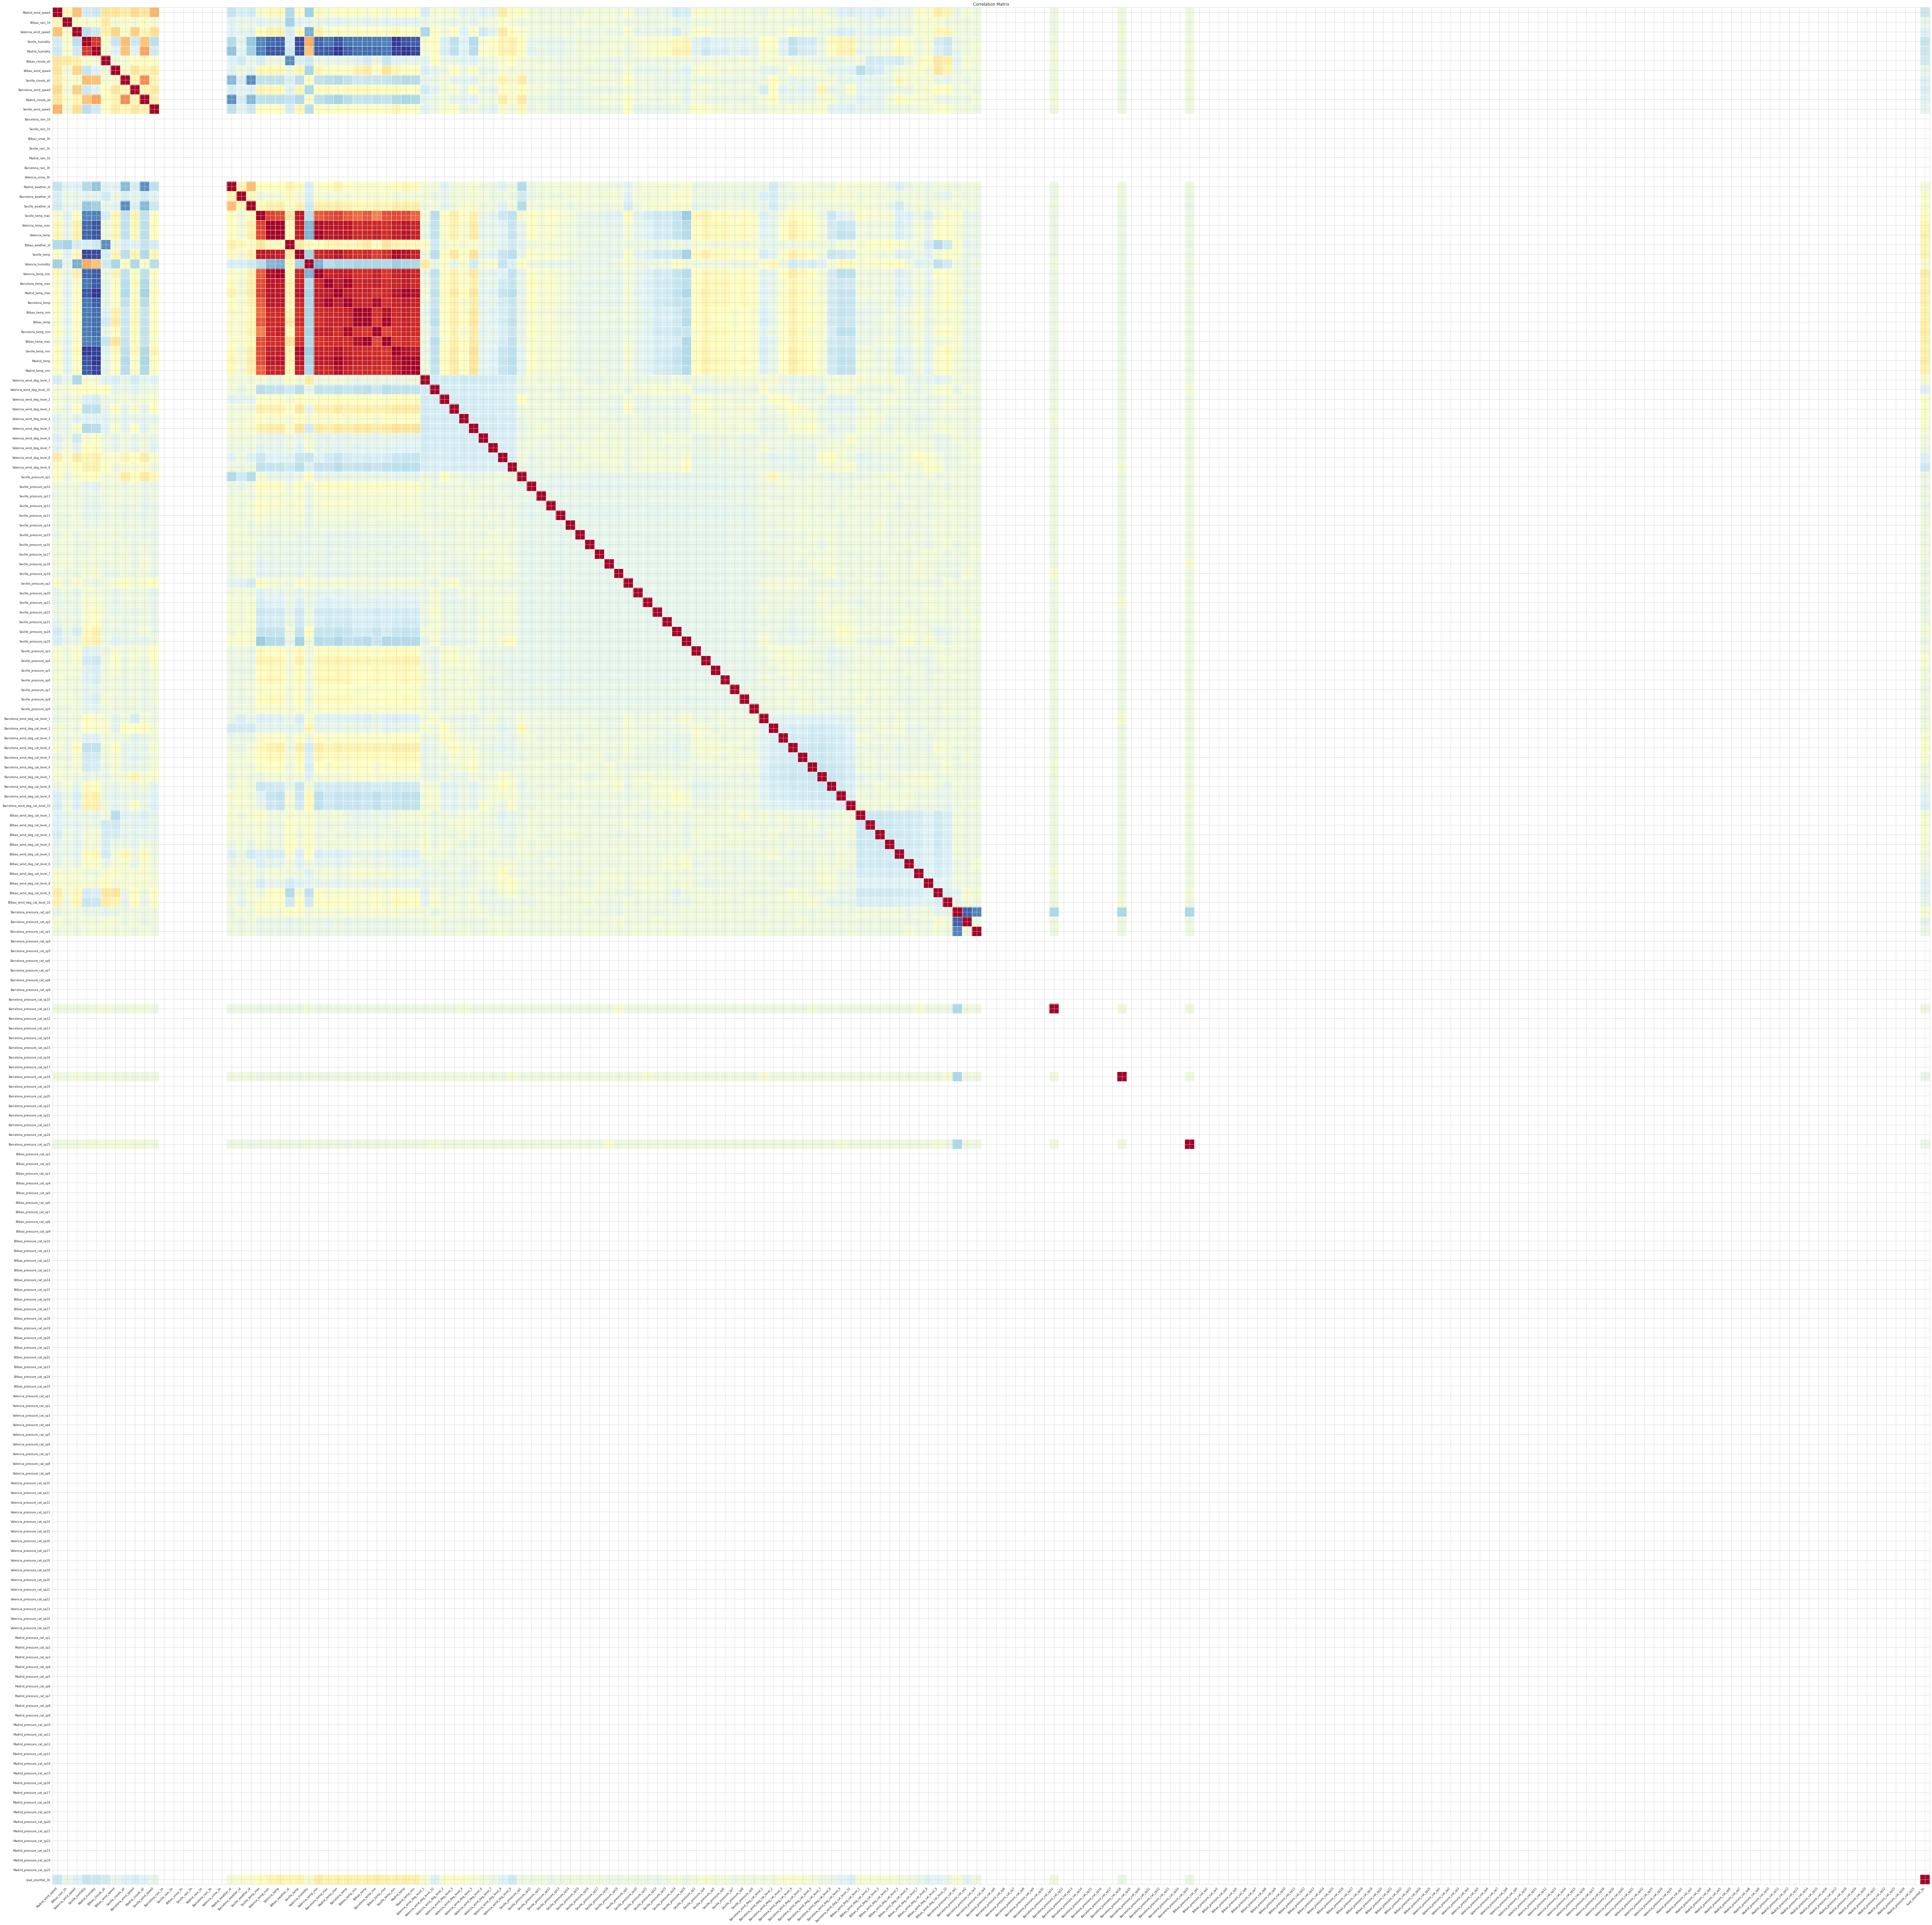

In [ ]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(80,80));
ax = fig.add_subplot(111);
plot_corr(df_dummies.corr(), xnames = df_dummies.corr().columns, ax = ax);

In [54]:
#Model DataFrame with all of the columns:
dfm = df_dummies.copy()
dfm = dfm.drop(['time'], axis=1)
# The dependent variable:
y_name = 'load_shortfall_3h'
# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in dfm.columns if col != y_name]

In [55]:
# Import the linear regression module
from sklearn.linear_model import LinearRegression

In [56]:
# Declare the model object
lm = LinearRegression()

In [58]:
# Split the dataset into the response, y, and features, X
y = dfm['load_shortfall_3h']
X = dfm.drop('load_shortfall_3h', axis=1)

In [59]:
# Fit the model to the training data (also known as training the model)
lm.fit(X, y)

LinearRegression()

In [60]:
# Extract the intercept, or y-cut, of our linear model
a = float(lm.intercept_)

In [61]:
# Extract the coefficient, or gradient, of our linear model
b = lm.coef_

In [62]:
print("Slope:\t\t", b)
print("Intercept:\t", float(a))

Slope:		 [-2.63255702e+02  2.69091218e+03 -8.98987300e+01 -3.63805837e+01
 -3.63345816e+00 -2.53025917e+00 -4.84056375e+01  6.80017614e-01
 -1.00333246e+02  6.32539327e+00 -7.07542281e+01 -1.46887859e+13
 -1.31725700e+13  3.40786820e+11 -3.12528432e+12 -4.57168126e+11
 -1.28789389e+12 -3.10834707e+12 -1.38554163e+00  1.16113086e+00
 -5.73821810e-01 -1.52013567e+02 -1.72961919e+02 -3.60144725e+02
  2.47983252e+00  3.44646144e+02  1.52256528e+01  6.11182925e+02
 -9.46445007e+01 -2.32589477e+02  4.59650184e+02  5.25422434e+02
 -1.13640956e+03 -2.27862305e+02  6.00949219e+02 -3.12962402e+02
  4.98013672e+02 -2.32848633e+02  5.45121223e+09  5.45121146e+09
  5.45121259e+09  5.45121257e+09  5.45121254e+09  5.45121222e+09
  5.45121232e+09  5.45121213e+09  5.45121185e+09  5.45121114e+09
 -7.71883093e+09 -7.71883172e+09 -7.71883103e+09 -7.71883190e+09
 -7.71883130e+09 -7.71883103e+09 -7.71883090e+09 -7.71883076e+09
 -7.71883072e+09 -7.71883100e+09 -7.71883118e+09 -7.71883107e+09
 -7.71883093e+09

In [63]:
# Generate the values that fall along our regression line
gen_y = lm.predict(X)

In [64]:
from sklearn import metrics
print("Training:")
# Calculate the mean-squared-error
print('MSE:', metrics.mean_squared_error(y, gen_y))
# Calculate the R-squared metric
print('R_squared:', metrics.r2_score(y, gen_y))

Training:
MSE: 22862967.937730793
R_squared: 0.16021851325873115


In [68]:
dfm2 = df_dummies2.copy()
X_test= dfm2.drop(['time'], axis=1)

In [70]:
dfm2.head(5)

time  Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Barcelona_wind_speed  Madrid_clouds_all  Seville_wind_speed  Barcelona_rain_1h  Seville_rain_1h  Bilbao_snow_3h  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  Seville_weather_id  Seville_temp_max  Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  Madrid_temp  Madrid_temp_min  Valencia_wind_deg_level_1  Valencia_wind_deg_level_10  Valencia_wind_deg_level_2  Valencia_wind_deg_level_3  Valencia_wind_deg_level_4  Valencia_wind_deg_level_5  Valencia_wind_deg_level_6  Valencia_wind_deg_level_7  Valencia_wind_deg_level_8  Valencia_wind_deg_level_9  \
0 2018-01-01 00:00:00           5.000000             0.0             5.000000         87.000000        71.333333          20.000000           3.000000            0.000000              4.000000                0.0            1.000000                0.0              0.0             0.0              0.0             0.0                0.0               0.0              800.0            800.000000          800.000000        284.483333         287.483333     287.483333         801.000000    283.673333          46.333333         287.483333          287.816667       280.816667      287.356667       276.150000   280.380000          286.816667       285.150000        283.150000   279.866667       279.150000                          0                           0                          0                          0                          0                          0                          0                          0                          1                          0   
1 2018-01-01 03:00:00           4.666667             0.0             5.333333         89.000000        78.000000           0.000000           3.666667            0.000000              4.666667                0.0            0.666667                0.0              0.0             0.0              0.0             0.0                0.0               0.0              800.0            800.333333          800.000000        282.483333         284.150000     284.150000         721.000000    281.673333          53.666667         284.150000          284.816667       280.483333      284.190000       277.816667   281.010000          283.483333       284.150000        281.150000   279.193333       278.150000                          0                           0                          0                          0                          0                          0                          0                          0                          1                          0   
2 2018-01-01 06:00:00           2.333333             0.0             5.000000         89.000000        89.666667           0.000000           2.333333            6.666667              4.000000                0.0            0.666667                0.0              0.0             0.0              0.0             0.0                0.0               0.0              800.0            800.000000          800.333333        280.816667         282.816667     282.816667         800.000000    280.613333          42.000000         282.816667          284.483333       276.483333      283.150000       276.816667   279.196667          281.816667       282.150000        280.483333   276.340000       276.150000                          0                           0                          0                          0                          0                          0                          0                          1                          0                          0   
3 2018-01-01 09:00:00           2.666667             0.0             5.333333         93.333333  

In [69]:
# Generate values of y from x, using the linear model
gen_y_test = lm.predict(X_test)

In [71]:
dfm2['load_shortfall_3h'] = gen_y_test

In [73]:
dfm2.head(5)

time  Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Barcelona_wind_speed  Madrid_clouds_all  Seville_wind_speed  Barcelona_rain_1h  Seville_rain_1h  Bilbao_snow_3h  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  Seville_weather_id  Seville_temp_max  Valencia_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  Valencia_temp_min  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  Madrid_temp  Madrid_temp_min  Valencia_wind_deg_level_1  Valencia_wind_deg_level_10  Valencia_wind_deg_level_2  Valencia_wind_deg_level_3  Valencia_wind_deg_level_4  Valencia_wind_deg_level_5  Valencia_wind_deg_level_6  Valencia_wind_deg_level_7  Valencia_wind_deg_level_8  Valencia_wind_deg_level_9  \
0 2018-01-01 00:00:00           5.000000             0.0             5.000000         87.000000        71.333333          20.000000           3.000000            0.000000              4.000000                0.0            1.000000                0.0              0.0             0.0              0.0             0.0                0.0               0.0              800.0            800.000000          800.000000        284.483333         287.483333     287.483333         801.000000    283.673333          46.333333         287.483333          287.816667       280.816667      287.356667       276.150000   280.380000          286.816667       285.150000        283.150000   279.866667       279.150000                          0                           0                          0                          0                          0                          0                          0                          0                          1                          0   
1 2018-01-01 03:00:00           4.666667             0.0             5.333333         89.000000        78.000000           0.000000           3.666667            0.000000              4.666667                0.0            0.666667                0.0              0.0             0.0              0.0             0.0                0.0               0.0              800.0            800.333333          800.000000        282.483333         284.150000     284.150000         721.000000    281.673333          53.666667         284.150000          284.816667       280.483333      284.190000       277.816667   281.010000          283.483333       284.150000        281.150000   279.193333       278.150000                          0                           0                          0                          0                          0                          0                          0                          0                          1                          0   
2 2018-01-01 06:00:00           2.333333             0.0             5.000000         89.000000        89.666667           0.000000           2.333333            6.666667              4.000000                0.0            0.666667                0.0              0.0             0.0              0.0             0.0                0.0               0.0              800.0            800.000000          800.333333        280.816667         282.816667     282.816667         800.000000    280.613333          42.000000         282.816667          284.483333       276.483333      283.150000       276.816667   279.196667          281.816667       282.150000        280.483333   276.340000       276.150000                          0                           0                          0                          0                          0                          0                          0                          1                          0                          0   
3 2018-01-01 09:00:00           2.666667             0.0             5.333333         93.333333  

In [74]:
submission1_data = dfm2.to_csv()  

In [77]:
from google.colab import files
dfm2.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from statsmodels.formula.api import ols
# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 load_shortfall_3h ~ Madrid_wind_speed + Bilbao_rain_1h + Valencia_wind_speed + Seville_humidity + Madrid_humidity + Bilbao_clouds_all + Bilbao_wind_speed + Seville_clouds_all + Barcelona_wind_speed + Madrid_clouds_all + Seville_wind_speed + Barcelona_rain_1h + Seville_rain_1h + Bilbao_snow_3h + Seville_rain_3h + Madrid_rain_1h + Barcelona_rain_3h + Valencia_snow_3h + Madrid_weather_id + Barcelona_weather_id + Seville_weather_id + Seville_temp_max + Valencia_temp_max + Valencia_temp + Bilbao_weather_id + Seville_temp + Valencia_humidity + Valencia_temp_min + Barcelona_temp_max + Madrid_temp_max + Barcelona_temp + Bilbao_temp_min + Bilbao_temp + Barcelona_temp_min + Bilbao_temp_max + Seville_temp_min + Madrid_temp + Madrid_temp_min + Valencia_wind_deg_level_1 + Valencia_wind_deg_level_10 + Valencia_wind_deg_level_2 + Valencia_wind_deg_level_3 + Valencia_wind_deg_level_4 + Valencia_wind_deg_level_5 + Valencia_wind_deg_level_6 + Valencia_wind_deg_level_7 + Valencia_wind_deg_leve

In [ ]:
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     19.02
Date:                Sun, 20 Feb 2022   Prob (F-statistic):          1.01e-260
Time:                        19:44:22   Log-Likelihood:                -86679.
No. Observations:                8763   AIC:                         1.735e+05
Df Residuals:                    8675   BIC:                         1.742e+05
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


In [ ]:
df_dummies_2 = pd.get_dummies(df_4, drop_first=True)
df_dummies_2.shape

(8763, 187)

In [ ]:
#Model DataFrame with all of the columns:
df_m = df_dummies_2.copy()
df_m = df_m.drop(['time'], axis=1)
# The dependent variable:
y_name = 'load_shortfall_3h'
# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in df_m.columns if col != y_name]

In [ ]:
from statsmodels.formula.api import ols
# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 load_shortfall_3h ~ Madrid_wind_speed + Bilbao_rain_1h + Valencia_wind_speed + Seville_humidity + Madrid_humidity + Bilbao_clouds_all + Bilbao_wind_speed + Seville_clouds_all + Barcelona_wind_speed + Madrid_clouds_all + Seville_wind_speed + Barcelona_rain_1h + Seville_rain_1h + Bilbao_snow_3h + Seville_rain_3h + Madrid_rain_1h + Barcelona_rain_3h + Valencia_snow_3h + Madrid_weather_id + Barcelona_weather_id + Seville_weather_id + Seville_temp_max + Valencia_temp_max + Valencia_temp + Bilbao_weather_id + Seville_temp + Valencia_humidity + Valencia_temp_min + Barcelona_temp_max + Madrid_temp_max + Barcelona_temp + Bilbao_temp_min + Bilbao_temp + Barcelona_temp_min + Bilbao_temp_max + Seville_temp_min + Madrid_temp + Madrid_temp_min + Valencia_wind_deg_level_10 + Valencia_wind_deg_level_2 + Valencia_wind_deg_level_3 + Valencia_wind_deg_level_4 + Valencia_wind_deg_level_5 + Valencia_wind_deg_level_6 + Valencia_wind_deg_level_7 + Valencia_wind_deg_level_8 + Valencia_wind_deg_leve

In [ ]:
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=df_m)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     19.02
Date:                Sun, 20 Feb 2022   Prob (F-statistic):          1.01e-260
Time:                        19:46:01   Log-Likelihood:                -86679.
No. Observations:                8763   AIC:                         1.735e+05
Df Residuals:                    8675   BIC:                         1.742e+05
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


In [ ]:
# Calculate correlations between predictor variables and the response variable
corrs = df_dummies.corr()['load_shortfall_3h'].sort_values(ascending=False)

In [ ]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'load_shortfall_3h']
for col in column_titles:
    p_val = round(pearsonr(df_dummies[col], df_dummies['load_shortfall_3h'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Correlation_Coefficient   P_Value
Valencia_temp_min                               0.201863  0.000000
Valencia_wind_deg_level_2                       0.060976  0.000000
Madrid_wind_speed                              -0.150981  0.000000
Barcelona_pressure_cat_sp2                     -0.055727  0.000000
Bilbao_wind_deg_cat_level_9                    -0.068043  0.000000
Barcelona_wind_deg_cat_level_9                 -0.076923  0.000000
Bilbao_wind_deg_cat_level_8                    -0.077907  0.000000
Madrid_clouds_all                              -0.081623  0.000000
Seville_weather_id                              0.061104  0.000000
Valencia_wind_speed                            -0.087192  0.000000
Valencia_wind_deg_level_10                     -0.091192  0.000000
Seville_clouds_all                             -0.091804  0.000000
Barcelona_wind_deg_cat_level_10                -0.096097  0.000000
Barcelona_wind_speed                           -0.103633  0.000000
Bilbao_clouds_all                              -0.127293  0.000000
Valencia_wind_deg_level_9                      -0.138409  0.000000
Madrid_humidity                                -0.150536  0.000000
Valencia_wind_deg_level_8                      -0.089261  0.000000
Barcelona_wind_deg_cat_level_4                  0.063164  0.000000
Seville_humidity                               -0.167290  0.000000
Valencia_wind_deg_level_4                       0.065441  0.000000
Valencia_temp_max                               0.144270  0.000000
Barcelona_weather_id                            0.063868  0.000000
Barcelona_temp_max                              0.164734  0.000000
Bilbao_temp_min                                 0.172920  0.000000
Valencia_temp                                   0.173225  0.000000
Seville_temp_min                                0.174718  0.000000
Madrid_temp_min                                 0.174744  0.000000
Bilbao_weather_id                               0.145875  0.000000
Bilbao_temp_max                                 0.180934  0.000000
Madrid_temp_max                                 0.182548  0.000000
Barcelona_temp                                  0.182673  0.000000
Seville_temp_max                                0.109834  0.000000
Madrid_temp                                     0.186036  0.000000
Barcelona_temp_min                              0.195984  0.000000
Bilbao_temp                                     0.176411  0.000000
Seville_temp                                    0.159343  0.000000
Valencia_wind_deg_level_3                       0.076440  0.000000
Barcelona_pressure_cat_sp1                      0.052687  0.000001
Seville_pressure_sp4                            0.051600  0.000001
Valencia_wind_deg_level_5                       0.051284  0.000002
Barcelona_wind_deg_cat_level_3                  0.050333  0.000002
Seville_wind_speed                             -0.048433  0.000006
Bilbao_wind_deg_cat_level_1                     0.043744  0.000042
Valencia_humidity                               0.043140  0.000054
Bilbao_wind_deg_cat_level_2                     0.043023  0.000056
Valencia_wind_deg_level_1                       0.042630  0.000066
Barcelona_wind_deg_cat_level_5                  0.042147  0.000079
Bilbao_wind_deg_cat_level_4                     0.041529  0.000101
Bilbao_wind_deg_cat_level_10                   -0.041368  0.000107
Bilbao_wind_deg_cat_level_3                     0.037611  0.000429
Bilbao_wind_speed                              -0.037192  0.000497
Bilbao_wind_deg_cat_level_7                    -0.034545  0.001220
Bilbao_rain_1h                                 -0.034412  0.001274
Seville_pressure_sp24                           0.033476  0.001724
Madrid_weather_id                               0.030868  0.003854
Seville_pressure_sp22                          -0.028929  0.006764
Barcelona_wind_deg_cat_level_8                 -0.026086  0.014605
Barcelona_pressure_cat_sp18                    -0.026073  0.014654
Seville_press

In [ ]:
# The dependent variable remains the same:
y_data = df_dummies[y_name]  # y_name = 'Loan_Size'

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = df_dummies[X_names]

In [ ]:
# Create the correlation matrix
corr = X_data.corr()

# Find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr[np.abs(corr) > 0.9]

Valencia_temp_min  Barcelona_temp_min  Madrid_temp  Barcelona_temp  Madrid_temp_max  Bilbao_temp_max  Bilbao_temp  Madrid_temp_min  Seville_temp_min  Valencia_temp  Bilbao_temp_min  Barcelona_temp_max  Seville_temp  Bilbao_weather_id  Valencia_temp_max  Seville_temp_max  Valencia_wind_deg_level_3  Valencia_wind_deg_level_4  Barcelona_weather_id  Barcelona_wind_deg_cat_level_4  Seville_weather_id  Valencia_wind_deg_level_2  Barcelona_pressure_cat_sp1  Seville_pressure_sp4  Valencia_wind_deg_level_5  Barcelona_wind_deg_cat_level_3  Bilbao_wind_deg_cat_level_1  Valencia_humidity  Bilbao_wind_deg_cat_level_2  Valencia_wind_deg_level_1  Barcelona_wind_deg_cat_level_5  Bilbao_wind_deg_cat_level_4  Bilbao_wind_deg_cat_level_3  Seville_pressure_sp24  Madrid_weather_id  Seville_pressure_sp12  Barcelona_pressure_cat_sp18  Barcelona_wind_deg_cat_level_8  Seville_pressure_sp22  Bilbao_rain_1h  Bilbao_wind_deg_cat_level_7  Bilbao_wind_speed  \
Valencia_temp_min                         1.000000                 NaN          NaN             NaN              NaN              NaN          NaN              NaN               NaN       0.985479              NaN                 NaN           NaN                NaN           0.949377               NaN                        NaN                        NaN                   NaN                             NaN                 NaN                        NaN                         NaN                   NaN                        NaN                             NaN                          NaN                NaN                          NaN                        NaN                             NaN                          NaN                          NaN                    NaN                NaN                    NaN                          NaN                             NaN                    NaN             NaN                          NaN                NaN   
Barcelona_temp_min                             NaN            1.000000          NaN        0.964089              NaN              NaN          NaN              NaN               NaN            NaN              NaN                 NaN           NaN                NaN                NaN               NaN                        NaN                        NaN                   NaN                             NaN                 NaN                        NaN                         NaN                   NaN                        NaN                             NaN                          NaN                NaN                          NaN                        NaN                             NaN                          NaN                          NaN                    NaN                NaN                    NaN                          NaN                             NaN                    NaN             NaN                          NaN                NaN   
Madrid_temp                                    NaN                 NaN     1.000000        0.903143         0.988871              NaN          NaN         0.973641          0.939079       0.915753              NaN                 NaN      0.917075                NaN           0.911331               NaN                        NaN                        NaN                   NaN                             NaN                 NaN                        NaN                         NaN                   NaN                        NaN                             NaN                          NaN                NaN                          NaN                        NaN                             NaN                          NaN                          NaN                    NaN                NaN                    NaN                          NaN                             NaN                    NaN             NaN                          NaN                NaN   
Barcelona_temp                                 NaN            0.964089     0.903143        1.000000         0.900428     

In [ ]:
# As before, we create the correlation matrix
# and find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

Valencia_temp  Valencia_temp_max  Barcelona_temp  Barcelona_temp  Madrid_temp_max  Madrid_temp_min  Seville_temp_min  Valencia_temp  Seville_temp  Valencia_temp_max  Barcelona_temp_min  Madrid_temp  Madrid_temp_max  Valencia_temp  Barcelona_temp_max  Valencia_temp_max  Madrid_temp  Barcelona_temp  Madrid_temp_min  Seville_temp_min  Valencia_temp  Barcelona_temp_max  Seville_temp  Valencia_temp_max  Bilbao_temp  Bilbao_temp_min  Bilbao_temp_max  Bilbao_temp_min  Madrid_temp  Madrid_temp_max  Seville_temp_min  Madrid_temp  Madrid_temp_max  Madrid_temp_min  Seville_temp  Valencia_temp_min  Madrid_temp  Barcelona_temp  Madrid_temp_max  Barcelona_temp_max  Valencia_temp_max  Bilbao_temp_max  Bilbao_temp  Barcelona_temp  Madrid_temp_max  Valencia_temp  Valencia_temp_max  Madrid_temp  Madrid_temp_max  Seville_temp_min  Seville_temp_max  Valencia_temp_min  Madrid_temp  Barcelona_temp  Madrid_temp_max  Valencia_temp  Barcelona_temp_max  Seville_temp
Valencia_temp_min        0.985479           0.949377        0.892024        0.892024         0.893368         0.860347          0.871738       0.985479      0.852492           0.949377            0.879687     0.897012         0.893368       0.985479            0.860510           0.949377     0.897012        0.892024         0.860347          0.871738       0.985479            0.860510      0.852492           0.949377     0.832393         0.832773         0.806606         0.832773     0.897012         0.893368          0.871738     0.897012         0.893368         0.860347      0.852492           1.000000     0.897012        0.892024         0.893368            0.860510           0.949377         0.806606     0.832393        0.892024         0.893368       0.985479           0.949377     0.897012         0.893368          0.871738          0.694121           1.000000     0.897012        0.892024         0.893368       0.985479            0.860510      0.852492
Valencia_temp_min        0.985479           0.949377        0.892024        0.892024         0.893368         0.860347          0.871738       0.985479      0.852492           0.949377            0.879687     0.897012         0.893368       0.985479            0.860510           0.949377     0.897012        0.892024         0.860347          0.871738       0.985479            0.860510      0.852492           0.949377     0.832393         0.832773         0.806606         0.832773     0.897012         0.893368          0.871738     0.897012         0.893368         0.860347      0.852492           1.000000     0.897012        0.892024         0.893368            0.860510           0.949377         0.806606     0.832393        0.892024         0.893368       0.985479           0.949377     0.897012         0.893368          0.871738          0.694121           1.000000     0.897012        0.892024         0.893368       0.985479            0.860510      0.852492
Barcelona_temp_min       0.874447           0.845057        0.964089        0.964089         0.836680         0.838985          0.831689       0.874447      0.779252           0.845057            1.000000     0.853881         0.836680       0.874447            0.885911           0.845057     0.853881        0.964089         0.838985          0.831689       0.874447            0.885911      0.779252           0.845057     0.810785         0.831224         0.764031         0.831224     0.853881         0.836680          0.831689     0.853881         0.836680         0.838985      0.779252           0.879687     0.853881        0.964089         0.836680            0.885911           0.845057         0.764031     0.810785        0.964089         0.836680       0.874447           0.845057     0.853881         0.836680          0.831689          0.586923           0.879687     0.853881        0.964089         0.836680       0.874447            0.885911      0.779252
Madrid_temp              0.915753           0.911331        0.903143        0.903143         0.988871         0.973641  

In [ ]:
# Lets take a new subset of our potential independent variables
X_remove = ['Valencia_temp_max','Seville_temp_max','Barcelona_temp_max','Bilbao_temp_min','Seville_temp_min','Madrid_temp_min','Bilbao_temp_max','Madrid_temp_max','Barcelona_temp_min','Valencia_temp_min']
X_corr_names = [col for col in X_names if col not in X_remove]

# Create our new OLS formula based-upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
print('Formula:\n\t{}'.format(formula_str))

Formula:
	load_shortfall_3h ~ Madrid_temp + Barcelona_temp + Bilbao_temp + Valencia_temp + Seville_temp + Bilbao_weather_id + Valencia_wind_deg_level_3 + Valencia_wind_deg_level_4 + Barcelona_weather_id + Barcelona_wind_deg_cat_level_4 + Seville_weather_id + Valencia_wind_deg_level_2 + Barcelona_pressure_cat_sp1 + Seville_pressure_sp4 + Valencia_wind_deg_level_5 + Barcelona_wind_deg_cat_level_3 + Bilbao_wind_deg_cat_level_1 + Valencia_humidity + Bilbao_wind_deg_cat_level_2 + Valencia_wind_deg_level_1 + Barcelona_wind_deg_cat_level_5 + Bilbao_wind_deg_cat_level_4 + Bilbao_wind_deg_cat_level_3 + Seville_pressure_sp24 + Madrid_weather_id + Seville_pressure_sp12 + Barcelona_pressure_cat_sp18 + Barcelona_wind_deg_cat_level_8 + Seville_pressure_sp22 + Bilbao_rain_1h + Bilbao_wind_deg_cat_level_7 + Bilbao_wind_speed + Bilbao_wind_deg_cat_level_10 + Seville_wind_speed + Barcelona_pressure_cat_sp2 + Bilbao_wind_deg_cat_level_9 + Barcelona_wind_deg_cat_level_9 + Bilbao_wind_deg_cat_level_8 + Mad

In [ ]:
# Fit the OLS model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Display the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     25.99
Date:                Sun, 20 Feb 2022   Prob (F-statistic):          2.03e-221
Time:                        20:10:02   Log-Likelihood:                -86835.
No. Observations:                8763   AIC:                         1.738e+05
Df Residuals:                    8712   BIC:                         1.741e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [ ]:
# Separate data into independent (X) and independent (y) variables
df_dummies = df_dummies.drop(['time'], axis = 1)
X_names = list(df_dummies.columns)
X_names.remove(y_name)
X_data = df_dummies[X_names]
y_data = df_dummies[y_name]

In [ ]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

VarianceThreshold(threshold=0.03)

In [ ]:
# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

Variable_Name  Variance
79    Barcelona_wind_deg_cat_level_7  0.126503
78    Barcelona_wind_deg_cat_level_6  0.118849
83       Bilbao_wind_deg_cat_level_1  0.111050
86       Bilbao_wind_deg_cat_level_4  0.110283
38         Valencia_wind_deg_level_1  0.107367
85       Bilbao_wind_deg_cat_level_3  0.106418
5                  Bilbao_clouds_all  0.105945
80    Barcelona_wind_deg_cat_level_8  0.105117
84       Bilbao_wind_deg_cat_level_2  0.102324
76    Barcelona_wind_deg_cat_level_4  0.099327
91       Bilbao_wind_deg_cat_level_9  0.098706
87       Bilbao_wind_deg_cat_level_5  0.094325
43         Valencia_wind_deg_level_5  0.093514
42         Valencia_wind_deg_level_4  0.093423
77    Barcelona_wind_deg_cat_level_5  0.092881
88       Bilbao_wind_deg_cat_level_6  0.091339
41         Valencia_wind_deg_level_3  0.091248
45         Valencia_wind_deg_level_7  0.090520
44         Valencia_wind_deg_level_6  0.090429
81    Barcelona_wind_deg_cat_level_9  0.089790
40         Valencia_wind_deg_level_2  0.089790
39        Valencia_wind_deg_level_10  0.086577
75    Barcelona_wind_deg_cat_level_3  0.084076
46         Valencia_wind_deg_level_8  0.082772
9                  Madrid_clouds_all  0.078692
74    Barcelona_wind_deg_cat_level_2  0.076650
89       Bilbao_wind_deg_cat_level_7  0.075889
47         Valencia_wind_deg_level_9  0.073308
4                    Madrid_humidity  0.067493
7                 Seville_clouds_all  0.062181
3                   Seville_humidity  0.060892
92      Bilbao_wind_deg_cat_level_10  0.060219
82   Barcelona_wind_deg_cat_level_10  0.058325
1                     Bilbao_rain_1h  0.057328
6                  Bilbao_wind_speed  0.056182
52             Seville_pressure_sp13  0.053802
49             Seville_pressure_sp10  0.049738
2                Valencia_wind_speed  0.048187
26                 Valencia_humidity  0.046143
71              Seville_pressure_sp8  0.045425
69              Seville_pressure_sp6  0.044702
65             Seville_pressure_sp25  0.044599
61             Seville_pressure_sp21  0.044392
64             Seville_pressure_sp24  0.044081
67              Seville_pressure_sp4  0.043977
56             Seville_pressure_sp17  0.043667
57             Seville_pressure_sp18  0.043044
55             Seville_pressure_sp16  0.042732
62             Seville_pressure_sp22  0.042732
90       Bilbao_wind_deg_cat_level_8  0.042525
51             Seville_pressure_sp12  0.041275
37                   Madrid_temp_min  0.041115
68              Seville_pressure_sp5  0.040649
58             Seville_pressure_sp19  0.039080
73    Barcelona_wind_deg_cat_level_1  0.038870
29                   Madrid_temp_max  0.038809
24                 Bilbao_weather_id  0.037692
36                       Madrid_temp  0.037678
60             Seville_pressure_sp20  0.037294
63             Seville_pressure_sp23  0.037189
54             Seville_pressure_sp15  0.035818
59              Seville_pressure_sp2  0.035712
25                      Seville_temp  0.034066
66              Seville_pressure_sp3  0.034018
21                  Seville_temp_max  0.033598
35                  Seville_temp_min  0.033520
30                    Barcelona_temp  0.031985
23                     Valencia_temp  0.031211
28                Barcelona_temp_max  0.030093
48              Seville_pressure_sp1  0.029862
33                Barcelona_temp_min  0.029827
27                 Valencia_temp_min  0.029252
22                 Valencia_temp_max  0.029065
53             Seville_pressure_sp14  0.028253
32                       Bilbao_temp  0.024880
31                   Bilbao_temp_min  0.021878
19              Barcelona_weather_id  0.021340
34                   Bilbao_temp_max  0.021109
10                Seville_wind_speed  0.020559
72              Seville_pressure_sp9  0.020447
0                  Madrid_wind_speed  0.020257
8               Barcelona_wind_speed  0.020017
70              Seville_pressure_sp7  0.019462
18                 Madrid_weather_id  0.016996
50             Seville_press

In [ ]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# View first few entries
X_new.head()

Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Madrid_clouds_all  Seville_temp_max  Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  Barcelona_temp_max  Madrid_temp_max  Barcelona_temp  Seville_temp_min  Madrid_temp  Madrid_temp_min  Valencia_wind_deg_level_1  Valencia_wind_deg_level_10  Valencia_wind_deg_level_2  Valencia_wind_deg_level_3  Valencia_wind_deg_level_4  Valencia_wind_deg_level_5  Valencia_wind_deg_level_6  Valencia_wind_deg_level_7  Valencia_wind_deg_level_8  Valencia_wind_deg_level_9  Seville_pressure_sp10  Seville_pressure_sp12  Seville_pressure_sp13  Seville_pressure_sp15  Seville_pressure_sp16  Seville_pressure_sp17  Seville_pressure_sp18  Seville_pressure_sp19  Seville_pressure_sp2  Seville_pressure_sp20  Seville_pressure_sp21  Seville_pressure_sp22  Seville_pressure_sp23  Seville_pressure_sp24  Seville_pressure_sp25  Seville_pressure_sp3  Seville_pressure_sp4  \
0             0.0             0.086957          0.720000         0.615658               0.00             0.1875                 0.0                0.0          0.045263       0.000000           0.993296      0.051072           0.728625            0.211393         0.019286        0.279352          0.091896     0.019827         0.021028                        0.0                         0.0                        0.0                        0.0                        0.0                        1.0                        0.0                        0.0                        0.0                        0.0                    0.0                    0.0                    0.0                    0.0                    0.0                    0.0                    0.0                    0.0                   0.0                    0.0                    0.0                    0.0                    0.0                    0.0                    1.0                   0.0                   0.0   
1             0.0             0.217391          0.763636         0.622776               0.00             0.1875                 0.0                0.0          0.059520       0.045397           0.993296      0.067158           0.676580            0.200628         0.028350        0.266986          0.107351     0.029145         0.030910                        0.0                         1.0                        0.0                        0.0                        0.0                        0.0                        0.0                        0.0                        0.0                        0.0                    0.0                    0.0                    0.0                    0.0                    0.0                    0.0                    0.0                    0.0                   0.0                    0.0                    0.0                    0.0                    0.0                    0.0                    1.0                   0.0                   0.0   
2             0.0             0.130435          0.687273         0.619217               0.00             0.1875                 0.0                0.0          0.138971       0.200319           0.993296      0.156803           0.617100            0.225004         0.156067        0.294986          0.193478     0.160443         0.170162                        0.0                         0.0                        0.0                        0.0                        0.0                        0.0                        0.0                        0.0                        0.0                        1.0                    0.0                    0.0                    0.0                    0.0                    0.0                    0.0                    0.0                    0.0                   0.0                    0.0                    0.0                    0.0                    0.0                    0.0                    1.0                   0.0                   0.0   
3      

In [ ]:
X_new.shape

(8763, 69)

In [ ]:
# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_new);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 load_shortfall_3h ~ Bilbao_rain_1h + Valencia_wind_speed + Seville_humidity + Madrid_humidity + Bilbao_clouds_all + Bilbao_wind_speed + Seville_clouds_all + Madrid_clouds_all + Seville_temp_max + Valencia_temp + Bilbao_weather_id + Seville_temp + Valencia_humidity + Barcelona_temp_max + Madrid_temp_max + Barcelona_temp + Seville_temp_min + Madrid_temp + Madrid_temp_min + Valencia_wind_deg_level_1 + Valencia_wind_deg_level_10 + Valencia_wind_deg_level_2 + Valencia_wind_deg_level_3 + Valencia_wind_deg_level_4 + Valencia_wind_deg_level_5 + Valencia_wind_deg_level_6 + Valencia_wind_deg_level_7 + Valencia_wind_deg_level_8 + Valencia_wind_deg_level_9 + Seville_pressure_sp10 + Seville_pressure_sp12 + Seville_pressure_sp13 + Seville_pressure_sp15 + Seville_pressure_sp16 + Seville_pressure_sp17 + Seville_pressure_sp18 + Seville_pressure_sp19 + Seville_pressure_sp2 + Seville_pressure_sp20 + Seville_pressure_sp21 + Seville_pressure_sp22 + Seville_pressure_sp23 + Seville_pressure_sp24 +

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset


In [ ]:
# create one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

In [ ]:
# evaluate one or more ML models

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic